In [6]:
#导入必要的包
import pandas as pd
import numpy as np
from mysystem.Data_preprocessing import Data_preprocessing
from mysystem.stock_selection_strategy import stock_selection_strategy
from mysystem.portfolio_strategy_signal import portfolio_strategy_signal
from mysystem.Strategy_verification import Strategy_verification

In [7]:
data=pd.read_feather('E:\当代量化交易系统的原理与实现\lecture\stk_daily.feather')
data.head()

,stk_id,date,open,high,low,close,volume,amount,cumadj
0,000001.SZ,2020-01-02,16.65,16.95,16.55,16.87,153023000.0,2.571200e+09,98.0986
1,000001.SZ,2020-01-03,16.94,17.31,16.92,17.18,111619000.0,1.914500e+09,98.0986
2,000001.SZ,2020-01-06,17.01,17.34,16.91,17.07,86208400.0,1.477930e+09,98.0986
3,000001.SZ,2020-01-07,17.13,17.28,16.95,17.15,72860800.0,1.247050e+09,98.0986
4,000001.SZ,2020-01-08,17.00,17.05,16.63,16.66,84782400.0,1.423610e+09,98.0986


In [8]:
#测试数据预处理包中的插补函数，对于停牌等原因导致的缺失进行插补。
#对于上市晚于初始日期的数据，该股在初始日期到上市日期之间的数据维持缺失状态，不插补
data_preprocessing_class=Data_preprocessing(data)
data_1=data_preprocessing_class.Data_interpolation()
data_1

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
873527.BJ 2022-12-26   8.03   8.18   8.00   8.06      86600.0  6.976570e+05   
          2022-12-27   8.01   8.16   8.00   8.05      61400.0  4.934280e+05   
          2022-12-28   8.04   8.09   8.03   8.06      43900.0  3.534580e+05   
          2022-12-29   8.00   8.22   8.00   8.08      31300.0  2.517610e+05   
          2022-12-30   8.04   8.09   8.00   8.05      68900.0  5.535780e+05   

                         cumadj  
stk_id    date                   
000001.SZ 2020-01-02  98.098600  
          2020-01-03  98.098600  
          2020-01-06  98.098600  
          2020-01-07  98.098600  
          2020-01-08  98.098600  
...                         ...  
873527.BJ 2022-12-26   0.773424  
          2022-12-27   0.773429  
          2022-12-28   0.773424  
          2022-12-29   0.773428  
          2022-12-30   0.773429  

[3252277 rows x 7 columns]

In [10]:
#测试预处理类中的数据截取函数，可以截取部分日期和时间的数据
data_1_part=data_1.reset_index()
stock=['000001.SZ','000002.SZ']
data_1_part=Data_preprocessing(data_1_part).Data_intercept(stock,'2022-01-05')
data_1_part

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2022-01-05  16.58  17.22  16.55  17.15  196200000.0  3.344120e+09   
          2022-01-06  17.11  17.27  17.00  17.12  110789000.0  1.896540e+09   
          2022-01-07  17.10  17.28  17.06  17.20  112663000.0  1.937710e+09   
          2022-01-10  17.29  17.42  17.03  17.19   90977400.0  1.563410e+09   
          2022-01-11  17.26  17.54  17.14  17.41  158200000.0  2.752490e+09   
...                     ...    ...    ...    ...          ...           ...   
000002.SZ 2022-12-26  18.74  18.75  18.20  18.37   57884500.0  1.063340e+09   
          2022-12-27  18.44  18.91  18.40  18.51   45940400.0  8.554050e+08   
          2022-12-28  18.48  18.79  18.30  18.58   39750300.0  7.364180e+08   
          2022-12-29  18.49  18.52  17.96  18.16   60686900.0  1.099880e+09   
          2022-12-30  18.23  18.32  17.93  18.20   51486400.0  9.351440e+08   

                       cumadj  
stk_id    date                 
000001.SZ 2022-01-05  100.572  
          2022-01-06  100.572  
          2022-01-07  100.572  
          2022-01-10  100.572  
          2022-01-11  100.572  
...                       ...  
000002.SZ 2022-12-26  129.246  
          2022-12-27  129.246  
          2022-12-28  129.246  
          2022-12-29  129.246  
          2022-12-30  129.246  

[482 rows x 7 columns]

In [11]:
#测试选股策略中的n日反转策略，默认5日反转策略，添加交易信号(持有信号)至表格右端
data_1_stock_selection_strategy=stock_selection_strategy(data_1).n_days_reversal_strategy(5)
data_1_stock_selection_strategy

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
873527.BJ 2022-12-26   8.03   8.18   8.00   8.06      86600.0  6.976570e+05   
          2022-12-27   8.01   8.16   8.00   8.05      61400.0  4.934280e+05   
          2022-12-28   8.04   8.09   8.03   8.06      43900.0  3.534580e+05   
          2022-12-29   8.00   8.22   8.00   8.08      31300.0  2.517610e+05   
          2022-12-30   8.04   8.09   8.00   8.05      68900.0  5.535780e+05   

                         cumadj  n_days_up  signal  
stk_id    date                                      
000001.SZ 2020-01-02  98.098600        NaN     0.0  
          2020-01-03  98.098600        NaN     0.0  
          2020-01-06  98.098600        NaN     0.0  
          2020-01-07  98.098600        NaN     0.0  
          2020-01-08  98.098600        NaN     0.0  
...                         ...        ...     ...  
873527.BJ 2022-12-26   0.773424  -0.052879     0.0  
          2022-12-27   0.773429  -0.037081     0.0  
          2022-12-28   0.773424  -0.025393     0.0  
          2022-12-29   0.773428  -0.008589     0.0  
          2022-12-30   0.773429   0.000000     0.0  

[3252277 rows x 9 columns]

In [12]:
#测试持仓比策略类中的均仓函数，输出持仓比信号至表格右端
data_1_portfolio_strategy=portfolio_strategy_signal(data_1_stock_selection_strategy).Average_holding()
data_1_portfolio_strategy

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
873527.BJ 2022-12-26   8.03   8.18   8.00   8.06      86600.0  6.976570e+05   
          2022-12-27   8.01   8.16   8.00   8.05      61400.0  4.934280e+05   
          2022-12-28   8.04   8.09   8.03   8.06      43900.0  3.534580e+05   
          2022-12-29   8.00   8.22   8.00   8.08      31300.0  2.517610e+05   
          2022-12-30   8.04   8.09   8.00   8.05      68900.0  5.535780e+05   

                         cumadj  n_days_up  signal  portfolio_strategy_signal  
stk_id    date                                                                 
000001.SZ 2020-01-02  98.098600        NaN     0.0                        0.0  
          2020-01-03  98.098600        NaN     0.0                        0.0  
          2020-01-06  98.098600        NaN     0.0                        0.0  
          2020-01-07  98.098600        NaN     0.0                        0.0  
          2020-01-08  98.098600        NaN     0.0                        0.0  
...                         ...        ...     ...                        ...  
873527.BJ 2022-12-26   0.773424  -0.052879     0.0                        0.0  
          2022-12-27   0.773429  -0.037081     0.0                        0.0  
          2022-12-28   0.773424  -0.025393     0.0                        0.0  
          2022-12-29   0.773428  -0.008589     0.0                        0.0  
          2022-12-30   0.773429   0.000000     0.0                        0.0  

[3252277 rows x 10 columns]

In [14]:
#测试策略检验模块，首先输出净值曲线的数据
Strategy_verification_test=Strategy_verification(data_1_portfolio_strategy)
Net_Worth_Curve=Strategy_verification_test.backtest()
Net_Worth_Curve

,total_yield
2020-01-02,1.000000
2020-01-03,1.000000
2020-01-06,1.000000
2020-01-07,1.000000
2020-01-08,1.000000
...,...
2022-12-26,0.076653
2022-12-27,0.075987
2022-12-28,0.076142
2022-12-29,0.074935


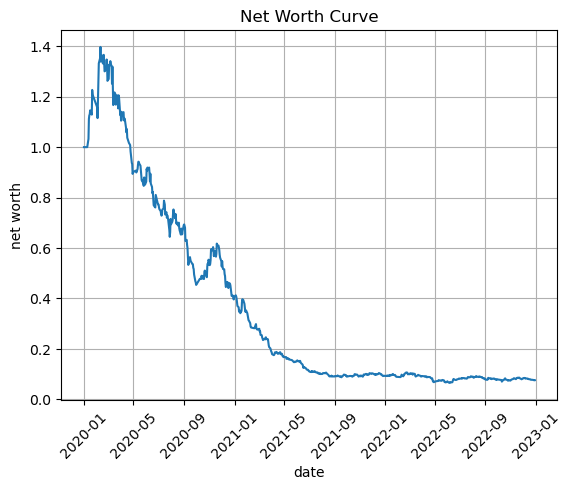

In [18]:
#绘制回测曲线
import matplotlib.pyplot as plt
plt.plot(Net_Worth_Curve)
plt.title('Net Worth Curve')
plt.grid()
plt.xlabel('date')
plt.ylabel('net worth')
plt.xticks(rotation=45)
plt.show()

In [20]:
#输出超额收益，假设无风险年利率为0.02
Strategy_verification_test.ExcessReturn(0.02)

2020-01-02         NaN
2020-01-03   -0.000381
2020-01-06   -0.000381
2020-01-07   -0.000381
2020-01-08   -0.000381
                ...   
2022-12-26   -0.007234
2022-12-27   -0.009064
2022-12-28    0.001660
2022-12-29   -0.016239
2022-12-30    0.005853
Name: ExcessReturn, Length: 728, dtype: float64

In [21]:
#输出年化收益
Strategy_verification_test.Annual_Return()

-0.5913029560613842

In [22]:
#输出年化波动
Strategy_verification_test.Annual_Volatility()

0.42371565477530687

In [23]:
#输出夏普比率，假设无风险年利率为0.02
Strategy_verification_test.Sharpe_Ratio(0.02)

-1.945333679459361

In [24]:
#输出最大回撤
Strategy_verification_test.Max_Drawdown()

-0.9537056547260986

In [26]:
#准备测试择时策略，先截取一支股票部分日期和时间的数据
data_1_part=data_1.reset_index()
stock=['000001.SZ']
data_1_part=Data_preprocessing(data_1_part).Data_intercept(stock)
data_1_part

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
          2022-12-26  12.99  13.04  12.71  12.77   79712000.0  1.021900e+09   
          2022-12-27  12.87  13.22  12.87  13.11   88600400.0  1.160090e+09   
          2022-12-28  13.16  13.38  13.00  13.14   79119200.0  1.042400e+09   
          2022-12-29  13.07  13.13  12.85  13.03   66689000.0  8.651450e+08   
          2022-12-30  13.04  13.28  12.96  13.16   81803600.0  1.074760e+09   

                        cumadj  
stk_id    date                  
000001.SZ 2020-01-02   98.0986  
          2020-01-03   98.0986  
          2020-01-06   98.0986  
          2020-01-07   98.0986  
          2020-01-08   98.0986  
...                        ...  
          2022-12-26  102.3820  
          2022-12-27  102.3820  
          2022-12-28  102.3820  
          2022-12-29  102.3820  
          2022-12-30  102.3820  

[728 rows x 7 columns]

In [28]:
#导入自编的择时策略包
from mysystem.timing_strategy import timing_strategy

In [29]:
#使用择时策略包中的金叉(10日线和5日线金叉)策略，输出交易信号在表格右侧
data_1_part_timing_strategy=timing_strategy(data_1_part).Golden_Cross_Strategy()
data_1_part_timing_strategy

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
          2022-12-26  12.99  13.04  12.71  12.77   79712000.0  1.021900e+09   
          2022-12-27  12.87  13.22  12.87  13.11   88600400.0  1.160090e+09   
          2022-12-28  13.16  13.38  13.00  13.14   79119200.0  1.042400e+09   
          2022-12-29  13.07  13.13  12.85  13.03   66689000.0  8.651450e+08   
          2022-12-30  13.04  13.28  12.96  13.16   81803600.0  1.074760e+09   

                        cumadj  signal  
stk_id    date                          
000001.SZ 2020-01-02   98.0986     0.0  
          2020-01-03   98.0986     0.0  
          2020-01-06   98.0986     0.0  
          2020-01-07   98.0986     0.0  
          2020-01-08   98.0986     0.0  
...                        ...     ...  
          2022-12-26  102.3820     0.0  
          2022-12-27  102.3820     0.0  
          2022-12-28  102.3820     0.0  
          2022-12-29  102.3820     1.0  
          2022-12-30  102.3820     1.0  

[728 rows x 8 columns]

In [30]:
#进行一步均仓操作(择时策略只测试了一只股票，所以这一步可能显得鸡肋，但对多只股票择时时更要这一步操作)
data_1_part_portfolio_strategy=portfolio_strategy_signal(data_1_part_timing_strategy).Average_holding()
data_1_part_portfolio_strategy

open   high    low  close       volume        amount  \
stk_id    date                                                                
000001.SZ 2020-01-02  16.65  16.95  16.55  16.87  153023000.0  2.571200e+09   
          2020-01-03  16.94  17.31  16.92  17.18  111619000.0  1.914500e+09   
          2020-01-06  17.01  17.34  16.91  17.07   86208400.0  1.477930e+09   
          2020-01-07  17.13  17.28  16.95  17.15   72860800.0  1.247050e+09   
          2020-01-08  17.00  17.05  16.63  16.66   84782400.0  1.423610e+09   
...                     ...    ...    ...    ...          ...           ...   
          2022-12-26  12.99  13.04  12.71  12.77   79712000.0  1.021900e+09   
          2022-12-27  12.87  13.22  12.87  13.11   88600400.0  1.160090e+09   
          2022-12-28  13.16  13.38  13.00  13.14   79119200.0  1.042400e+09   
          2022-12-29  13.07  13.13  12.85  13.03   66689000.0  8.651450e+08   
          2022-12-30  13.04  13.28  12.96  13.16   81803600.0  1.074760e+09   

                        cumadj  signal  portfolio_strategy_signal  
stk_id    date                                                     
000001.SZ 2020-01-02   98.0986     0.0                        0.0  
          2020-01-03   98.0986     0.0                        0.0  
          2020-01-06   98.0986     0.0                        0.0  
          2020-01-07   98.0986     0.0                        0.0  
          2020-01-08   98.0986     0.0                        0.0  
...                        ...     ...                        ...  
          2022-12-26  102.3820     0.0                        0.0  
          2022-12-27  102.3820     0.0                        0.0  
          2022-12-28  102.3820     0.0                        0.0  
          2022-12-29  102.3820     1.0                        1.0  
          2022-12-30  102.3820     1.0                        1.0  

[728 rows x 9 columns]

In [35]:
#测试策略检验模块，首先输出择时策略的净值曲线的数据
Strategy_verification_test_2=Strategy_verification(data_1_part_portfolio_strategy)
Net_Worth_Curve=Strategy_verification_test_2.backtest()
Net_Worth_Curve

,total_yield
2020-01-02,1.000000
2020-01-03,1.000000
2020-01-06,1.000000
2020-01-07,1.000000
2020-01-08,1.000000
...,...
2022-12-26,0.956289
2022-12-27,0.956289
2022-12-28,0.956289
2022-12-29,0.956289


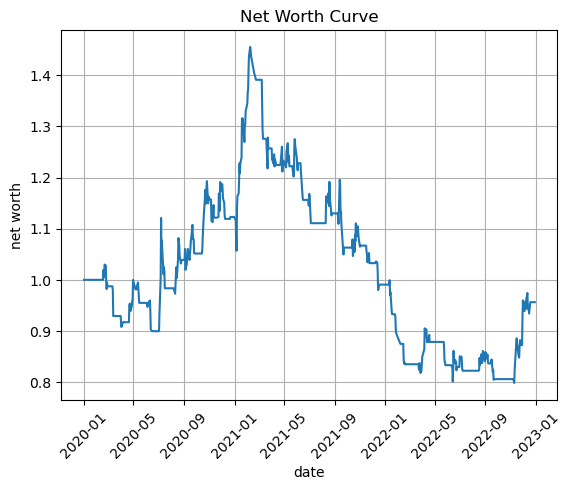

In [36]:
#绘制回测曲线
import matplotlib.pyplot as plt
plt.plot(Net_Worth_Curve)
plt.title('Net Worth Curve')
plt.grid()
plt.xlabel('date')
plt.ylabel('net worth')
plt.xticks(rotation=45)
plt.show()

In [37]:
#输出超额收益，假设无风险年利率为0.02
Strategy_verification_test_2.ExcessReturn(0.02)

2020-01-02         NaN
2020-01-03   -0.000381
2020-01-06   -0.000381
2020-01-07   -0.000381
2020-01-08   -0.000381
                ...   
2022-12-26   -0.000381
2022-12-27   -0.000381
2022-12-28   -0.000381
2022-12-29   -0.000381
2022-12-30   -0.000381
Name: ExcessReturn, Length: 728, dtype: float64

In [38]:
#输出年化收益
Strategy_verification_test_2.Annual_Return()

-0.015352182169539819

In [39]:
#输出年化波动
Strategy_verification_test_2.Annual_Volatility()

0.23993954770880982

In [41]:
#输出夏普比率，假设无风险年利率为0.02
Strategy_verification_test_2.Sharpe_Ratio(0.02)

-0.029336157639639343

In [42]:
#输出最大回撤
Strategy_verification_test_2.Max_Drawdown()

-0.45154824334670807